In [1]:
from os import getcwd
import glob
import numpy as np
import pandas as pd
import missingno as msno

Display Settings

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', -1)

In [3]:
dic = pd.read_excel('data/LCDataDictionary.xlsx')

In [4]:
dic

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


Load Data

In [5]:
csv_files = glob.glob(f'{getcwd()}/data/*.csv')
df = pd.concat((pd.read_csv(f, header=1, low_memory=False) for f in csv_files))

Descriptive Statistics

In [6]:
df.shape

(2001513, 145)

In [7]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [8]:
df.dtypes

id                                            object 
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                          object 
int_rate                                      object 
installment                                   float64
grade                                         object 
sub_grade                                     object 
emp_title                                     object 
emp_length                                    object 
home_ownership                                object 
annual_inc                                    float64
verification_status                           object 
issue_d                                       object 
loan_status                                   object 
pymnt_plan                                    object 
url                         

In [9]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.001484e+06,2.001484e+06,2.001484e+06,2.001484e+06,2.001480e+06,0.0,2.000336e+06,2.001455e+06,2.001454e+06,987550.000000,327148.000000,2.001455e+06,2.001455e+06,2.001484e+06,2.001455e+06,2.001484e+06,2.001484e+06,2.001484e+06,2.001484e+06,2.001484e+06,2.001484e+06,2.001484e+06,2.001484e+06,2.001484e+06,2.001484e+06,2.001339e+06,520533.000000,2001484.0,8.584100e+04,85837.000000,2.001455e+06,1.931208e+06,1.931208e+06,1.135354e+06,1.135355e+06,1.135355e+06,1.135355e+06,1.101071e+06,1.135355e+06,974960.000000,1.135355e+06,1.135355e+06,1.135355e+06,1.135208e+06,1.931208e+06,1.135355e+06,1.135354e+06,1.135354e+06,1.951454e+06,1.931156e+06,1.929980e+06,1.928959e+06,2.001339e+06,2.001455e+06,1.871924e+06,1.931207e+06,1.931207e+06,1.931208e+06,1.951454e+06,1.931299e+06,468314.000000,1.737690e+06,665576.000000,1.931208e+06,1.931208e+06,1.931208e+06,1.942894e+06,1.931208e+06,1.931208e+06,1.931208e+06,1.931207e+06,1.931208e+06,1.942894e+06,1.853469e+06,1.931208e+06,1.931208e+06,1.931208e+06,1.931053e+06,1.929538e+06,2.000119e+06,2.001379e+06,1.931208e+06,1.951454e+06,1.951454e+06,1.931208e+06,73151.000000,73152.000000,73152.000000,73152.000000,71892.000000,73152.000000,73152.000000,73152.000000,73152.000000,24604.000000,8908.0,8908.000000,8908.0,8908.000000,7129.000000,8908.000000,8908.000000,26876.000000,26876.000000,26876.000000
mean,NaN,1.493131e+04,1.492536e+04,1.490517e+04,4.435614e+02,7.764020e+04,NaN,1.872292e+01,3.166336e-01,5.936209e-01,34.284372,71.133609,1.162660e+01,2.065837e-01,1.671671e+04,2.436824e+01,4.343247e+03,4.342079e+03,1.181948e+04,1.179951e+04,9.296314e+03,2.391854e+03,1.337452e+00,1.299767e+02,2.136894e+01,3.393835e+03,1.820081e-02,43.916032,1.0,1.210818e+05,19.236188,4.685092e-03,2.381601e+02,1.423588e+05,9.394541e-01,2.793783e+00,6.743433e-01,1.566994e+00,2.130054e+01,3.549231e+04,69.337727,1.302162e+00,2.775553e+00,5.804118e+03,5.768296e+01,3.409241e+04,9.903960e-01,1.474166e+00,2.055785e+00,4.530439e+00,1.353498e+04,1.092862e+04,5.897307e+01,8.672194e-03,1.380672e+01,1.261463e+02,1.826801e+02,1.387478e+01,8.245360e+00,1.587343e+00,2.474574e+01,39.183699,6.963713e+00,35.568715,5.038411e-01,3.685515e+00,5.666012e+00,4.767697e+00,7.818708e+00,8.441538e+00,8.256739e+00,1.415864e+01,5.611569e+00,1.

In [10]:
df.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
member_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,NaN,1.000000,0.999715,0.998881,0.946195,0.195903,NaN,0.041996,-0.007173,-0.027161,-0.014661,0.002820,0.184882,-0.059053,0.320433,0.204684,0.462670,0.462674,0.660047,0.660083,0.584832,0.589446,0.073609,0.122966,0.117410,0.323524,-0.021140,0.002097,NaN,0.363700,0.059490,0.000239,-0.004444,0.316043,-0.020866,0.033032,0.000595,0.024853,-0.015323,0.153056,-0.090169,-0.046221,-0.034583,0.376391,0.003662,0.327874,0.000958,0.074601,0.008993,-0.000101,0.230504,0.202358,0.052035,-0.002816,0.001182,0.127843,0.170356,0.053336,0.027052,0.224429,0.037868,-0.035407,0.003204,-0.026973,-0.053447,0.193460,0.151833,0.213606,0.194392,0.081340,0.163702,0.166585,0.151013,0.182328,-0.001597,0.001574,-0.023706,-0.026757,0.089595,0.022472,-0.087505,0.009283,0.339799,0.280172,0.373985,0.209812,0.369464,-0.065290,0.194600,0.214882,0.023491,0.055112,0.200566,-0.052137,-0.079086,0.104665,NaN,0.714720,NaN,0.044912,0.714113,0.850043,0.470027,0.810436,-0.062906,0.224208
funded_amnt,NaN,0.999715,1.000000,0.999234,0.946595,0.195860,NaN,0.042240,-0.007047,-0.027478,-0.014669,0.002802,0.185074,-0.058894,0.320356,0.204598,0.463169,0.463172,0.659922,0.660023,0.584737,0.589283,0.073630,0.122945,0.117461,0.323526,-0.021067,0.002098,NaN,0.363700,0.059494,0.000281,-0.004444,0.316043,-0.020865,0.033034,0.000596,0.024854,-0.015323,0.153057,-0.090169,-0.046220,-0.034582,0.376391,0.003661,0.327875,0.000960,0.074602,0.008994,-0.000100,0.230505,0.202364,0.052030,-0.002763,0.001194,0.127843,0.170356,0.053337,0.027052,0.224428,0.037868,-0.035407,0.003205,-0.026971,-0.053448,0.193460,0.151833,0.213606,0.194391,0.081340,0.163702,0.166583,0.151013,0.182328,-0.001597,0.001574,-0.023707,-0.026757,0.089594,0.022470,-0.087376,0.009372,0.339799,0.280173,0.373991,0.209811,0.369464,-0.065290,0.194600,0.214882,0.023491,0.055112,0.200566,-0.05213

In [11]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,30000.0,30000.0,30000.0,36 months,8.46%,946.48,A,A5,Mental Health Therapist,5 years,MORTGAGE,70000.0,Source Verified,Sep-2018,Issued,n,NaN,NaN,medical,Medical expenses,562xx,MN,37.12,0.0,Sep-2002,0.0,NaN,NaN,9.0,0.0,8475.0,40%,57.0,w,30000.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Oct-2018,Oct-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,256717.0,2.0,4.0,2.0,3.0,3.0,114898.0,73.0,0.0,0.0,3674.0,65.0,21200.0,1.0,0.0,4.0,3.0,32090.0,6526.0,36.0,0.0,0.0,192.0,184.0,40.0,3.0,2.0,148.0,NaN,3.0,NaN,0.0,1.0,2.0,1.0,4.0,44.0,3.0,11.0,2.0,9.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,298892.0,123373.0,10200.0,133192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000.0,10000.0,10000.0,36 months,7.84%,312.63,A,A4,NaN,NaN,OWN,50000.0,Verified,Sep-2018,Issued,n,NaN,NaN,credit_card,Credit card refinancing,629xx,IL,9.00,1.0,May-2002,0.0,5.0,NaN,13.0,0.0,8542.0,26.6%,19.0,w,10000.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Oct-2018,Oct-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,8883.0,0.0,1.0,0.0,0.0,33.0,341.0,14.0,1.0,2.0,1655.0,26.0,32100.0,0.0,0.0,0.0,2.0,683.0,8920.0,28.1,0.0,0.0,196.0,146.0,11.0,11.0,1.0,17.0,NaN,NaN,NaN,0.0,3.0,6.0,6.0,9.0,2.0,12.0,16.0,6.0,13.0,0.0,0.0,0.0,1.0,94.7,33.3,0.0,0.0,34500.0,8883.0,12400.0,2400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4200.0,4200.0,4200.0,36 months,13.56%,142.66,C,C1,Database Marketing Coordinator,< 1 year,MORTGAGE,38500.0,Source Verified,Sep-2018,Issued,n,NaN,NaN,vacation,Vacation,395xx,MS,30.34,1.0,Jul-2003,0.0,16

In [12]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
118645,NaN,NaN,10000.0,10000.0,10000.0,36 months,11.99%,332.10,B,B5,Teacher,10+ years,OWN,64000.0,Source Verified,Oct-2017,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,603xx,IL,12.96,0.0,Feb-1995,0.0,NaN,NaN,6.0,0.0,7094.0,70.9%,13.0,w,7055.47,7055.47,3978.54,3978.54,2944.53,1034.01,0.0,0.0,0.0,Oct-2018,332.10,Nov-2018,Oct-2018,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,77.0,189735.0,1.0,2.0,1.0,2.0,3.0,29354.0,100.0,0.0,1.0,1864.0,93.0,10000.0,0.0,0.0,3.0,3.0,31623.0,136.0,93.2,0.0,0.0,134.0,271.0,15.0,3.0,3.0,111.0,NaN,3.0,NaN,0.0,1.0,3.0,1.0,2.0,4.0,3.0,6.0,3.0,6.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,203417.0,36448.0,2000.0,29317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
118646,NaN,NaN,12000.0,12000.0,12000.0,60 months,21.45%,327.69,D,D5,NaN,NaN,RENT,60000.0,Not Verified,Oct-2017,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,996xx,AK,30.82,2.0,Jul-2003,1.0,7.0,NaN,8.0,0.0,12927.0,34.9%,17.0,w,10499.90,10499.90,3896.53,3896.53,1500.10,2396.43,0.0,0.0,0.0,Oct-2018,327.69,Nov-2018,Oct-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,535.0,65238.0,2.0,4.0,2.0,3.0,4.0,52311.0,64.0,1.0,2.0,2406.0,55.0,37000.0,0.0,12.0,4.0,5.0,8155.0,18789.0,14.6,0.0,0.0,170.0,67.0,4.0,4.0,0.0,16.0,9.0,5.0,7.0,0.0,2.0,3.0,2.0,3.0,12.0,4.0,5.0,3.0,8.0,0.0,0.0,0.0,3.0,88.2,0.0,0.0,0.0,118975.0,65238.0,22000.0,81975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
118647,NaN,NaN,16550.0,16550.0,16550.0,60 months,21.45%,451.94,D,D5,BABYSITTER,3 years,RENT,60000.0,Not Verified,Oct-2017,Current,n,NaN,NaN,cr

In [13]:
df.sample(100)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
240330,NaN,NaN,12000.0,12000.0,12000.000000,36 months,9.99%,387.15,B,B3,RN,2 years,MORTGAGE,65000.0,Source Verified,Jul-2015,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,711xx,LA,25.72,0.0,Dec-2007,0.0,64.0,NaN,12.0,0.0,5797.0,82.8%,18.0,w,0.00,0.00,13326.400000,13326.40,12000.00,1326.40,0.00,0.00,0.0000,Nov-2016,7525.81,NaN,Nov-2016,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,192.0,285696.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000.0,NaN,NaN,NaN,5.0,23808.0,903.0,86.5,0.0,0.0,90.0,39.0,19.0,9.0,1.0,27.0,NaN,11.0,NaN,0.0,2.0,2.0,2.0,2.0,14.0,3.0,3.0,2.0,12.0,0.0,0.0,0.0,3.0,94.4,50.0,0.0,0.0,292005.0,118130.0,6700.0,115505.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
161147,NaN,NaN,28000.0,28000.0,28000.000000,60 months,17.86%,708.89,D,D5,Mortgage Loan Officer,< 1 year,MORTGAGE,85000.0,Source Verified,Aug-2015,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,681xx,NE,17.44,1.0,Dec-1998,0.0,23.0,82.0,14.0,1.0,25781.0,75.8%,37.0,f,0.00,0.00,38751.053662,38751.05,28000.00,10751.05,0.00,0.00,0.0000,Mar-2018,17512.13,NaN,Apr-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,275020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34000.0,NaN,NaN,NaN,7.0,19644.0,5319.0,82.7,0.0,0.0,145.0,200.0,10.0,6.0,11.0,10.0,NaN,6.0,NaN,0.0,8.0,9.0,9.0,16.0,6.0,11.0,20.0,9.0,14.0,0.0,0.0,0.0,2.0,97.1,88.9,1.0,0.0,316039.0,57628.0,30700.0,33779.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
91114,NaN,NaN,7200.0,7200.0,7200.000000,36 months,21.49%,273.08,D,D5,Merchant Integration Engineer,5 years

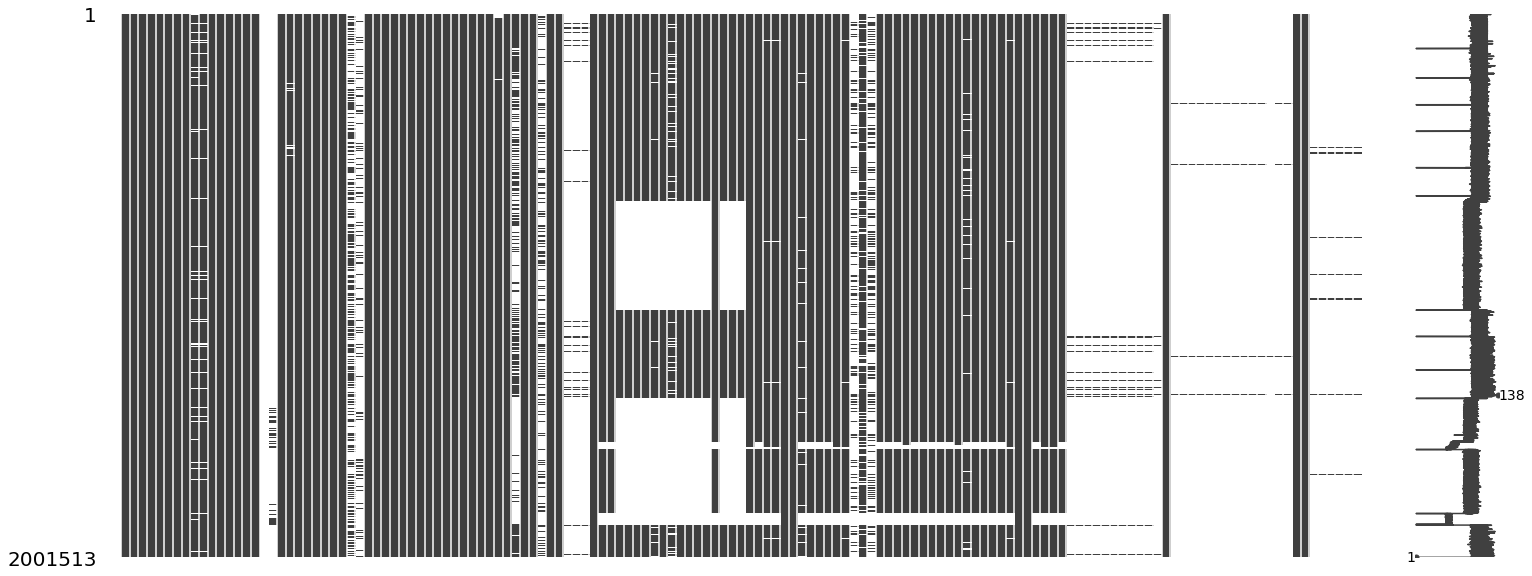

In [14]:
msno.matrix(df)

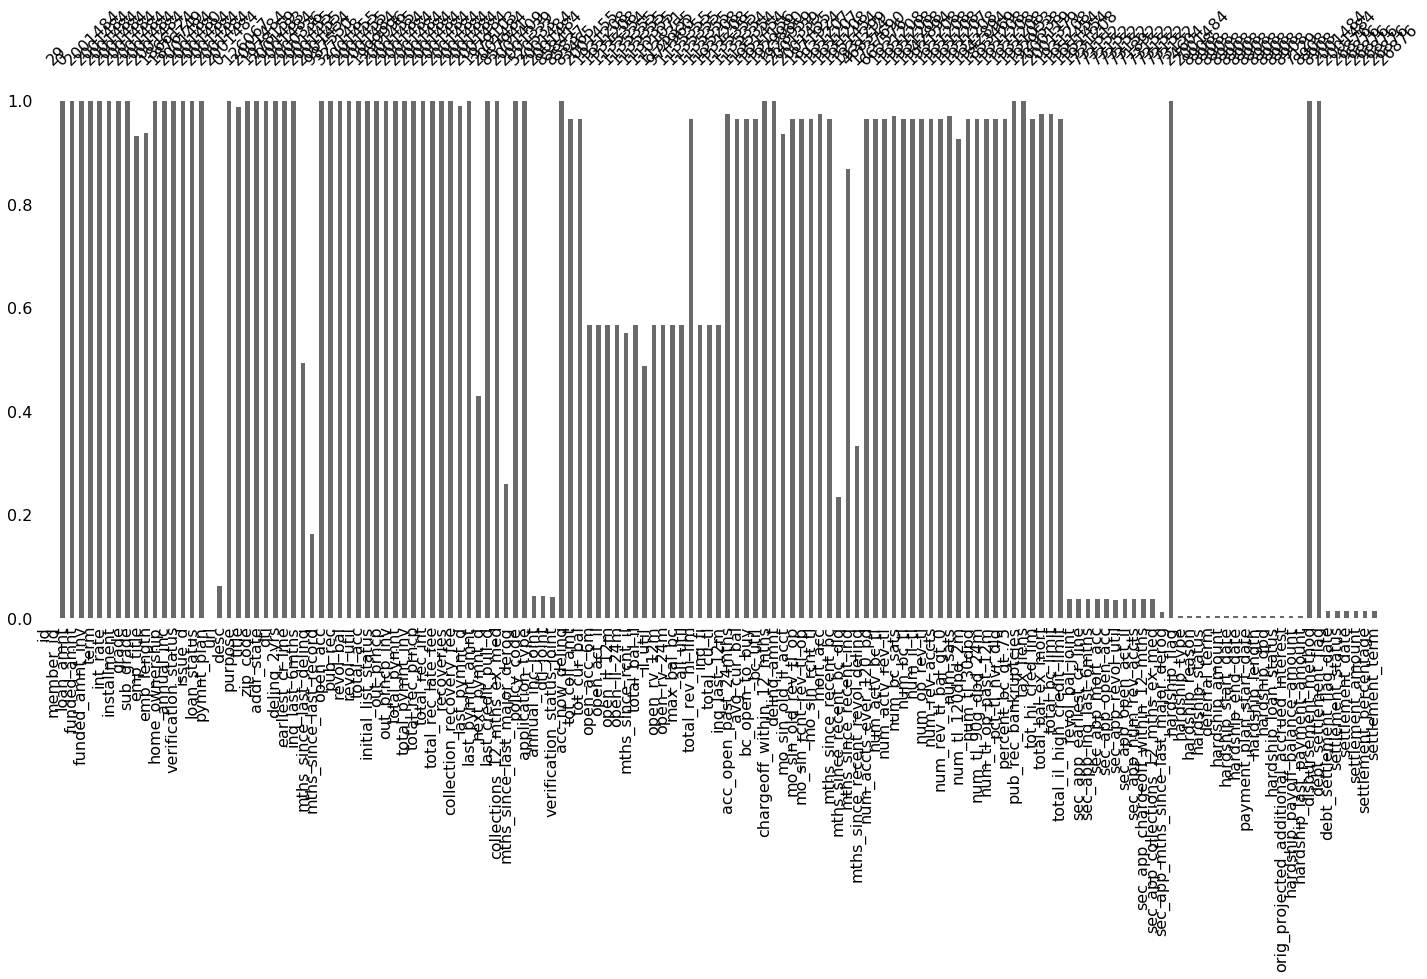

In [15]:
msno.bar(df)

In [16]:
loan_status = df.loan_status

In [17]:
loan_status.shape

(2001513,)

In [18]:
loan_status.head()

0    Issued
1    Issued
2    Issued
3    Issued
4    Issued
Name: loan_status, dtype: object

In [19]:
loan_status.value_counts()

Fully Paid                                             914248
Current                                                801148
Charged Off                                            229295
Late (31-120 days)                                     21659 
Issued                                                 13621 
In Grace Period                                        11519 
Late (16-30 days)                                      6230  
Does not meet the credit policy. Status:Fully Paid     1988  
Default                                                1015  
Does not meet the credit policy. Status:Charged Off    761   
Name: loan_status, dtype: int64